  Buenas noches, les adjunto su segundo trabajo del curso de Estadística y Análisis Exploratorio, por favor seguir las instrucciones de solución dadas en el texto y además les recuerdo que tienen plazo para entregar hasta el día viernes 20 de septiembre 6:00pm como un archivo en pdf que debe incluir los planteamientos simbólicos de las preguntas y los códigos en Python utilizados, el archivo se debe llamar Trabajo2EAE_nombreintregrante1_nombreintegrante2_nombreintegrante3 y debe ser enviado como respuesta directa a este correo.

La base de datos asignada a su grupo contiene la información de un nicho de mercado donde se midieron varias variables para posteriores análisis a 200 empresas, de esa base se tomó la medición de la inversión que hizo cada empresa a marketing digital el último mes y sus respectivas ventas en pesos colombianos.

1. Construir un IC para al 95% de confianza necesario para responder: ¿Puede afirmarse que la inversión en Marketing es superior a los cuatro millones de pesos colombianos? Justifique su respuesta.

2. ¿Se puede afirmar que las ventas medias de las empresas encuestadas son superiores a su inversión en marketing en más de dos millones de pesos colombianos? Justifique su respuesta mediante una prueba de hipótesis con una significancia del 6%.

3. Analice si hay una relación lineal entre las variables inversión en Marketing y ventas, mediante una regresión lineal con todos sus repecivos componentes.

In [40]:
import pandas as pd
from scipy.stats import t, norm, shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
DatosMd = pd.read_csv("https://raw.githubusercontent.com/JuanJoseNaranjo/Distribuciones_estadistica/main/DatosTrabajo2EAE20242.csv", sep=';')
DatosMd

,Empresa,Inversión en marketing digital,Venta
0,1,2008148,50225258.80
1,2,2041273,45103182.50
2,3,2057234,45143085.00
3,4,2067740,45169350.00
4,5,2145127,58773569.43
...,...,...,...
195,196,6977006,66977011.10
196,197,7005563,90445616.60
197,198,7065010,76803062.00
198,199,7080760,77080765.10


1. Construir un IC para al 95% de confianza necesario para responder:

¿Puede afirmarse que la inversión en Marketing es superior a los cuatro millones de pesos colombianos? Justifique su respuesta.

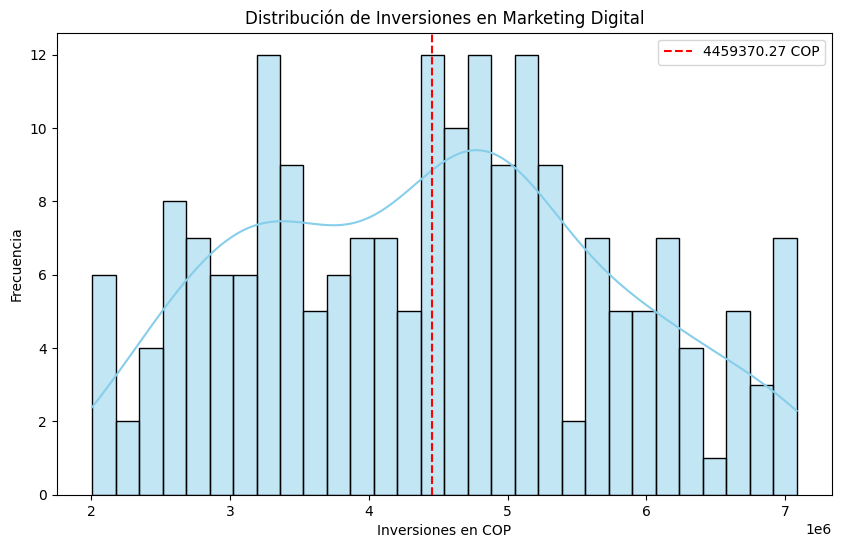

In [3]:
# Construcción intervalo de confianza
# Miremos como se comporta la inversión en marketing digital

# Gráfica de distribución
columna_inversiones = 'Inversión en marketing digital'  
plt.figure(figsize=(10,6))
sns.histplot(DatosMd[columna_inversiones], bins=30, kde=True, color='skyblue')
plt.axvline(DatosMd[columna_inversiones].mean(), color='red', linestyle='--', label=f'{DatosMd[columna_inversiones].mean()} COP')
plt.title('Distribución de Inversiones en Marketing Digital')
plt.xlabel('Inversiones en COP')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [4]:
# De la gráfica anterior vemos que las inversiones se asemejan a una distribución normal, para validar esto usaremos 
# una prueba de bondad de ajuste Shapiro-Wilks 

# H0: las inversiones tiene distribución normal(miu, sigma**2)
# H1: las inversiones no tiene distribución normal(miu, sigma**2)

shapiro(DatosMd[columna_inversiones])

ShapiroResult(statistic=0.9768123256116342, pvalue=0.0021485292350816422)

In [5]:
# Del test encontramos que el valor p tiene un valor de 0.002148, y tenemos un alpha de 0.05. por ende Vp < α y se rechaza H0 a favor de la alterna

valorP = shapiro(DatosMd[columna_inversiones])[1]
alpha = 0.05
#Teniendo en cuenta que el valor de alpha es  0.05
if valorP < alpha: 
    print("Rechazamos la hipótesis nula: Las variable inversión no se distribuye de forma normal con un 0.95 de confianza")


Rechazamos la hipótesis nula: Las variable inversión no se distribuye de forma normal con un 0.95 de confianza


Dado que n = 200, osea n >= 30 y por la prueba de Shapiro la variable no se distribuye de forma normal, concluimos que calculamos el intervalo de confianza como:

media muestral+/-z(alpha/2)*desviación estandar/raiz(n)

In [6]:
n = len(DatosMd)

# hallamos la media y varianza de la variable:

media_md = DatosMd[columna_inversiones].mean()
std_md = DatosMd[columna_inversiones].std()
print(f"La media muestral de las inversiones en marketing digital es {media_md:.4f}")
print(f"La desviación muestral de las inversiones en marketing digital es {std_md:.4f}")

# Hallamos Z alpha/2 con un 95% de confianza
z_alpha2 = norm.ppf(1 - 0.05/2)

lim_sup = media_md+z_alpha2*std_md/np.sqrt(n)
lim_inf = media_md-z_alpha2*std_md/np.sqrt(n)
print(f"el intervalo de confianza se encuentra entre ({lim_inf:.4f}, {lim_sup:.4f})")

La media muestral de las inversiones en marketing digital es 4459370.2700
La desviación muestral de las inversiones en marketing digital es 1304053.6104
el intervalo de confianza se encuentra entre (4278640.9814, 4640099.5586)


 En base a la observación de las 200 empresas de inversión en marketing digital, la media muestral, desviación muestral y el intervalo
 de confianza, se puede concluir que la media de inversión de marketing es superior a cuatro millones de pesos colombianos dado que 
 la media varía en un intervalo de (4_278_640.9814 COP, 4_640_099.5586 COP) para un 95% de confianza.

2. ¿Se puede afirmar que las ventas medias de las empresas encuestadas son superiores a su inversión en marketing
en más de dos millones de pesos colombianos? Justifique su respuesta mediante una prueba de hipótesis con una
significancia del 6%.

In [7]:
# Para determinar si las variables de distribuyen de una forma normal realizamos prueba de bondad de ajuste Shapiro-Wilks
# Dado que ya se determinó en el punto anterior que la variable inversión no se comporta de esa forma, realizaremos igual
# para la variable ventas

# H0: las inversiones tiene distribución normal(miu, sigma**2)
# H1: las inversiones no tiene distribución normal(miu, sigma**2)

shapiro(DatosMd['Venta'])

ShapiroResult(statistic=0.9694677235439646, pvalue=0.00024277889714315198)

In [8]:
# Del test encontramos que el valor p tiene un valor de 0.0002427, y tenemos un alpha de 0.06. por ende Vp < α y se rechaza H0 a favor de la alterna

valorP = shapiro(DatosMd['Venta'])[1]
alpha = 0.06
#Teniendo en cuenta que el valor de alpha es  0.06
if valorP < alpha: 
    print("Rechazamos la hipótesis nula: Las variable inversión no se distribuye de forma normal con un 0.94 de confianza")


Rechazamos la hipótesis nula: Las variable inversión no se distribuye de forma normal con un 0.94 de confianza


Dado que las dos variables, ventas e inversiones no se distribuyen de forma normal, podemos aplicar lo siguiente:

Hipotesís Nula (H0) -> La media ventas es igual o menor a la inversión en marketing en mas de dos millones de pesos

H0 -> μventas <= μmarketing + 2000000

Hipotesís Alternativa (Ha) -> la media de ventas es mayor a la inversion en marketing mas dos millones de pesos

Ha -> μventas > μmarketing + 2000000

Ha -> μventas -μmarketing > 2000000

Nivel de significancia es del 6% 
α=0.06

In [9]:
#Sacar media en las dos variables
mediaVentas = DatosMd['Venta'].mean()
mediaInversionMarketing = DatosMd['Inversión en marketing digital'].mean()
#tamaño de los datos
n = len(DatosMd)
#Significancia
alpha = 0.06
valorHipotesis = 2000000 # 2 millones de pesos
#Se calcula la desviación estandar
desviacionVentas = DatosMd['Venta'].std()
desviacionInversionMarketing = DatosMd['Inversión en marketing digital'].std()

print(f'Media de Ventas: {mediaVentas}')
print(f'Media de Inversión: {mediaInversionMarketing}')
print(f'Desviación de Ventas: {desviacionVentas}')
print(f'Desviación de Inversión: {desviacionInversionMarketing}')



Media de Ventas: 60356063.80190001
Media de Inversión: 4459370.27
Desviación de Ventas: 8134994.291359559
Desviación de Inversión: 1304053.6104073517


Calculamos el valor de Z dada por la formula teniendo en cuenta que la variable Ventas y la variable Inversión en Marketing Digital no se comportan como una distribución normal (no indicado en ejercicio) y sabiendo que n  >= 30, entonces podemos usar:

Zc = (mediaVentas - mediaInversionMarketing) -valorHipotesis / raiz((desviacionVentas^2/n)+ (desviacionInversionMarketing^2/n))  

In [10]:
#Calcular Z

z =((mediaVentas - mediaInversionMarketing) - valorHipotesis) / np.sqrt((desviacionVentas**2/n) + (desviacionInversionMarketing**2/n)) 
z

92.5146267723789

Calculamos valor p

In [11]:
valorP = 1 - norm.cdf(z)
valorP

0.0

Dado los resultados podemos concluir lo siguiente

In [12]:
#Teniendo en cuenta que el valor de alpha es  0.06
if valorP < alpha: 
    print("Rechazamos la hipótesis nula: las ventas medias son superiores a la inversión más 2,000,000 COP, con un nivel de confianza del 94%.")
else:
    print("No rechazamos la hipótesis nula: no hay suficiente evidencia para afirmar que las ventas medias son superiores a la inversión más 2,000,000 COP, con un nivel de confianza del 94%.")

Rechazamos la hipótesis nula: las ventas medias son superiores a la inversión más 2,000,000 COP, con un nivel de confianza del 94%.


3. Analice si hay una relación lineal entre las variables inversión en Marketing y ventas, mediante una regresión lineal con todos sus repecivos componentes.

Formula Utilizada:

y = β0+β1 * x

x= variable independiente

y= dependiente ventas

β0= intercepto

β1=pendiente midiendo el cambio en y




In [13]:
x= DatosMd['Inversión en marketing digital'] # Variable independiente
y= DatosMd['Venta'] # variable dependiente

In [14]:
x=sm.add_constant(x) # Añadimos la constante

modelo_lineal=sm.OLS(y,x).fit() # Ajustamos el modelo
resumen_modelo=modelo_lineal.summary() # Resumen del modelo
#print(resumen_modelo)


In [15]:


intercepcion=modelo_lineal.params.iloc[0] # Valor de la intercepción
pendiente=modelo_lineal.params.iloc[1] # Valor de la pendiente
coeficiente_determinacion=modelo_lineal.rsquared # Coeficiente de determinación
valor_p=modelo_lineal.pvalues.iloc[1]  # Valor p para la pendiente



print(f'Intercepción (β0): {intercepcion}')
print(f'Pendiente (β1): {pendiente}')
print(f'Coeficiente de determinación (R²): {coeficiente_determinacion}')
print(f'Valor p para la pendiente: {valor_p}')
print(resumen_modelo)




Intercepción (β0): 39575016.104937404
Pendiente (β1): 4.660085715861082
Coeficiente de determinación (R²): 0.5580385437669773
Valor p para la pendiente: 5.903083608001289e-37
                            OLS Regression Results                            
Dep. Variable:                  Venta   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     250.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           5.90e-37
Time:                        21:27:16   Log-Likelihood:                -3384.0
No. Observations:                 200   AIC:                             6772.
Df Residuals:                     198   BIC:                             6779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   

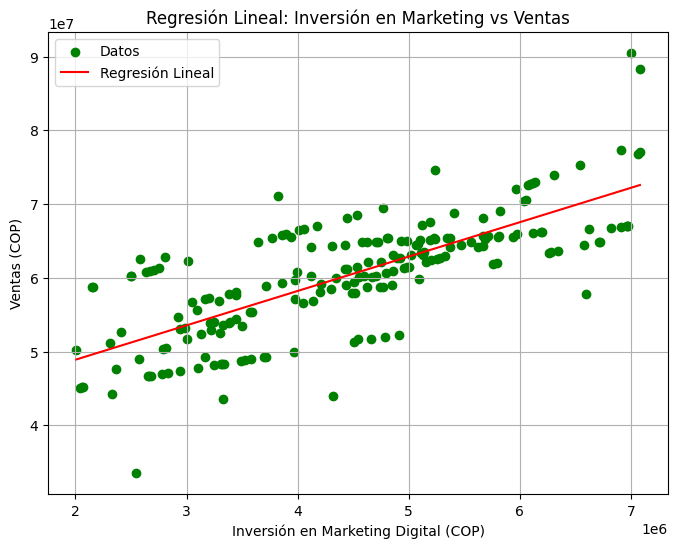

In [16]:
predicion_ventas= modelo_lineal.predict(x) # Predicción de ventas
# Graficar la línea de regresión con los datos reales
plt.figure(figsize=(8, 6))

# Gráfico de dispersión de las ventas reales vs inversión
plt.scatter(DatosMd['Inversión en marketing digital'], DatosMd['Venta'], color='green', label='Datos')

# Graficar la línea de regresión
plt.plot(DatosMd['Inversión en marketing digital'], predicion_ventas, color='red', label='Regresión Lineal')

# Añadir etiquetas y título
plt.title('Regresión Lineal: Inversión en Marketing vs Ventas')
plt.xlabel('Inversión en Marketing Digital (COP)')
plt.ylabel('Ventas (COP)')
plt.legend()
plt.grid(True)

En conclusion podriamos indicar que existe una relación positiva y significativa entre la inversión en marketing digital y las ventas.La línea roja muestra cómo se predicen las ventas en función de la inversión en marketing (datos en verde), observando el valor de la pendiente nos confirma la realacion entre estas variables.

Otro punto importante analizar es el coeficiente de determinacion que esta en un 55.8% de la variablidad en ventas puede explicarse por la inversion en marketing.

### Validando los supuestos del modelo de regresion lineal

Aleatoriedad

Normalidad

Varianza constante

Linealidad

In [26]:
# Calculo de error (residuales)

residuales= predicion_ventas - y# calculo de residuales
print(residuales)
print(f'Promedio de residuales: {residuales.mean()}')

0     -1.292101e+06
1      3.984341e+06
2      4.018818e+06
3      4.041512e+06
4     -9.202078e+06
           ...     
195    5.111451e+06
196   -1.822408e+07
197   -4.304494e+06
198   -4.508800e+06
199   -1.579012e+07
Length: 200, dtype: float64
Promedio de residuales: -1.8775463104248047e-08


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13000\859553120.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


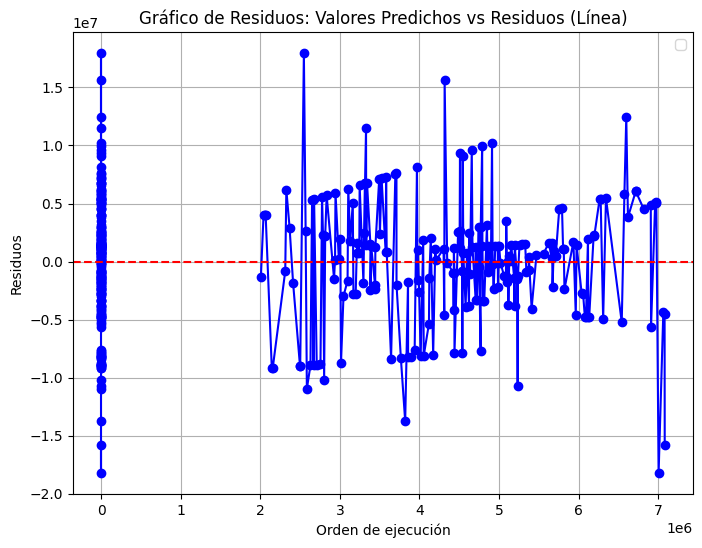

In [27]:
#Aleatoriedad

plt.figure(figsize=(8, 6))
plt.plot(x, residuales, color='blue', linestyle='-', marker='o')
plt.axhline(y=0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de Residuos: Valores Predichos vs Residuos (Línea)')
plt.xlabel('Orden de ejecución')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()

Dado que el modelo captura bien la relación lineal entre inversión y ventas.
Si hay un patrón en los residuos, el modelo puede estar omitiendo aspectos no lineales, y el coeficiente de determinacion (R2)muestra que hay variabilidad en las ventas no explicada únicamente por la inversión en marketing.

In [19]:
# Normalidad

shapiro(x)

ShapiroResult(statistic=0.8001467084629076, pvalue=7.414879149769762e-22)

In [24]:
shapiro(y)

ShapiroResult(statistic=0.9694677235439646, pvalue=0.00024277889714315198)

Así como en los puntos anteriores, dado que los test muestran un valor p < alpha bajo la evidencia estadistica, se puede concluir que las variables no se distribuyen de una forma normal bajo un 95% de confianza

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13000\2448449339.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


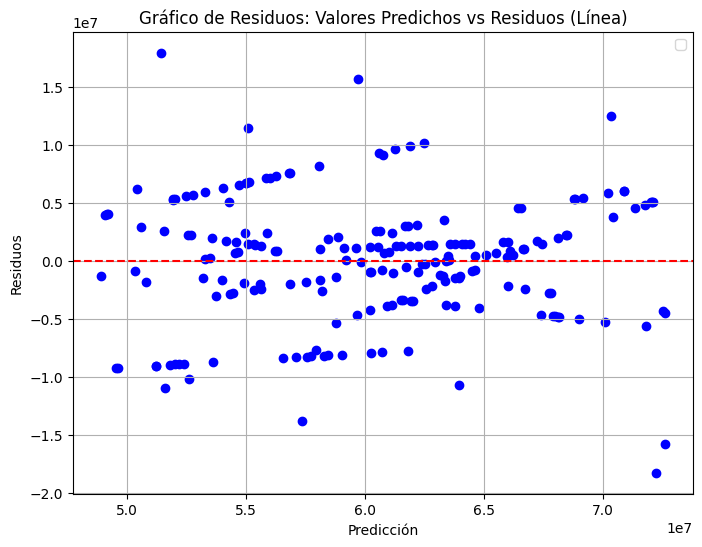

In [29]:
# Linealidad y Varianza

plt.figure(figsize=(8, 6))
plt.scatter(predicion_ventas, residuales, color='blue', linestyle='-', marker='o')
plt.axhline(y=0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de Residuos: Valores Predichos vs Residuos (Línea)')
plt.xlabel('Predicción')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()

In [42]:
# Para confirmar si la varianza es constante usamos el test númerico de Levene como:

# H0: La varianza es constante
# Ha: La varianza no es constante

levene(residuales, predicion_ventas)

LeveneResult(statistic=7.800152114964961, pvalue=0.005476329589362566)

Como valor p < alpha = 0.05 según la evidencia estadistica, rechazamos H0 a favor de la alternativa, por ello se puede concluir que la varianza no es constante con un 95% de confianza